In [1]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib as plt

warnings.filterwarnings('ignore')

# Fonte dos dados

- Poa: https://chronomax.com.br/app/2305/
- SP Intl: https://www.yescom.com.br/maratonasp/2023/resultados.asp
- Rio: http://www.chiptiming.com.br/resultados/maratonadorio2023/maratona42k
- SP City: https://www.chronomax.com.br/resultados/g-live.html?f=2023/2513/sp_city_marathon.clax
- Floripa: https://www.chronomax.com.br/resultados/g-live.html?f=2023/2708/maratona_de_floripa_internacional.clax
- Curitiba: https://www.chiptiming.com.br/resultados/maratonadecuritiba2023

In [2]:
columns = ["name", "time", "gender"]

poa_results = pd.read_csv("data/2023_poa.csv")[columns].assign(maratona="Porto Alegre")
sp_city_results = pd.read_csv("data/2023_sp_city.csv")[columns].assign(maratona="SP City")
floripa_results = pd.read_csv("data/2023_floripa.csv")[columns].assign(maratona="Floripa")
rio_results = pd.read_csv("data/2023_rio/2023_rio.csv")[columns].assign(maratona="Rio")
int_sp_results = pd.read_csv("data/2023_int_sp/2023_int_sp.csv")[columns].assign(maratona="SP Intl")
curitiba_results = pd.read_csv("data/2023_curitiba/2023_curitiba.csv")[columns].assign(maratona="Curitiba")

df = pd.concat([poa_results, sp_city_results, floripa_results, rio_results, int_sp_results, curitiba_results])

In [3]:
df['time_in_seconds'] = df['time'].str.split(':').apply(lambda x: int(x[0]) * 60 * 60 + int(x[1]) * 60 + int(x[2] if len(x) > 2 else 0))
df["time_in_hours"] = df["time_in_seconds"]/(60*60)
df["time_timestamp"] = pd.to_datetime(df['time'], format='%H:%M:%S')
df["gender"] = df["gender"].replace("Masculino", "M")
df["gender"] = df["gender"].replace("Feminino", "F")

Text(0.5, 0.95, 'created by insta:fabiofabris87')

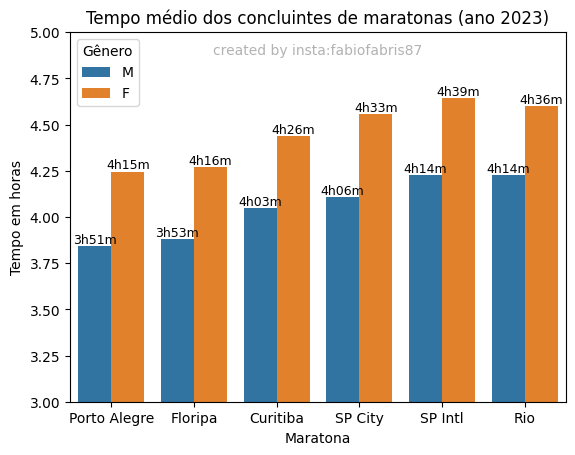

In [30]:
tmp_df = df.groupby(["maratona", "gender"])[["time_in_hours"]].agg("mean").reset_index().sort_values("time_in_hours")
ordering = tmp_df.index

ax = sns.barplot(tmp_df, x="maratona", y="time_in_hours", hue="gender", bottom=0)

ax.set_title("Tempo médio dos concluintes de maratonas (ano 2023)")
ax.set(ylabel='Tempo em horas', xlabel='Maratona')

ax.bar_label(ax.containers[0], fontsize=9, fmt=lambda x: str(int(x))+"h"+
                              "{:02.0f}m".format(60*(x-int(x))));
ax.bar_label(ax.containers[1], fontsize=9, fmt=lambda x: str(int(x))+"h"+
                              "{:02.0f}m".format(60*(x-int(x))));

ax.set(ylim=(3, 5))
ax.legend(title='Gênero', loc='upper left')#, labels=['F', 'M'])

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

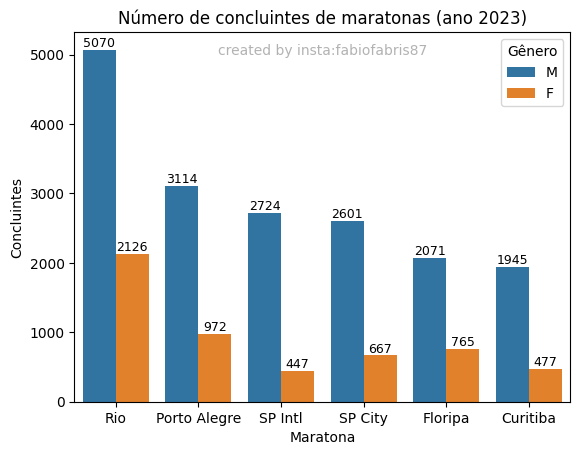

In [5]:
ax = sns.barplot(df.groupby(["maratona", "gender"])[["time"]].agg("count").reset_index().sort_values(["gender", "time"], ascending=[False, False]), x="maratona", y="time", hue="gender")
ax.set_title("Número de concluintes de maratonas (ano 2023)")
ax.set(ylabel='Concluintes', xlabel='Maratona')
ax.bar_label(ax.containers[0], fontsize=9);
ax.bar_label(ax.containers[1], fontsize=9);
ax.legend(title='Gênero', loc='upper right')#, labels=['F', 'M'])
ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

In [25]:
df["is_sub_4"] = (df["time_in_hours"] < 4).astype("int")*100
df["is_sub_3"] = (df["time_in_hours"] < 3).astype("int")*100
df["is_sub_3_n"] = (df["time_in_hours"] < 3).astype("int")
df["is_sub_4_n"] = (df["time_in_hours"] < 4).astype("int")

Text(0.5, 0.95, 'created by insta:fabiofabris87')

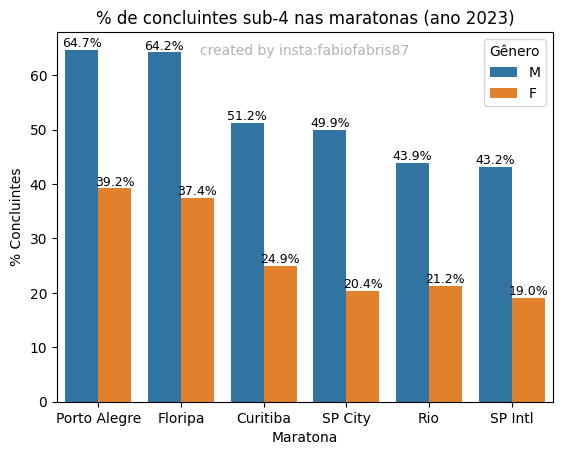

In [7]:
ax = sns.barplot(df.groupby(["maratona", "gender"])[["is_sub_4"]].agg("mean").reset_index().sort_values(["gender", "is_sub_4"], ascending=[False, False]), x="maratona", y="is_sub_4", hue="gender")
ax.set_title("% de concluintes sub-4 nas maratonas (ano 2023)")
ax.set(ylabel='% Concluintes', xlabel='Maratona')
ax.bar_label(ax.containers[0], fontsize=9, fmt=(lambda x : "{:0.1f}%".format(x)));
ax.bar_label(ax.containers[1], fontsize=9, fmt=(lambda x : "{:0.1f}%".format(x)));
ax.legend(title='Gênero', loc='upper right')#, labels=['F', 'M'])

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

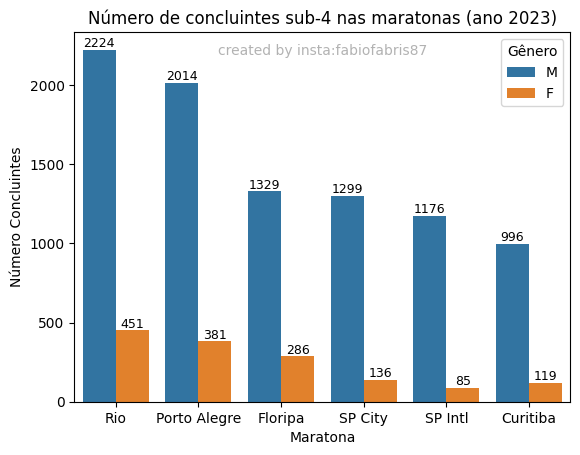

In [26]:
ax = sns.barplot(df.groupby(["maratona", "gender"])[["is_sub_4_n"]].agg("sum").reset_index().sort_values(["gender", "is_sub_4_n"], ascending=[False, False]), x="maratona", y="is_sub_4_n", hue="gender")
ax.set_title("Número de concluintes sub-4 nas maratonas (ano 2023)")
ax.set(ylabel='Número Concluintes', xlabel='Maratona')
ax.bar_label(ax.containers[0], fontsize=9);
ax.bar_label(ax.containers[1], fontsize=9);
ax.legend(title='Gênero', loc='upper right')#, labels=['F', 'M'])

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

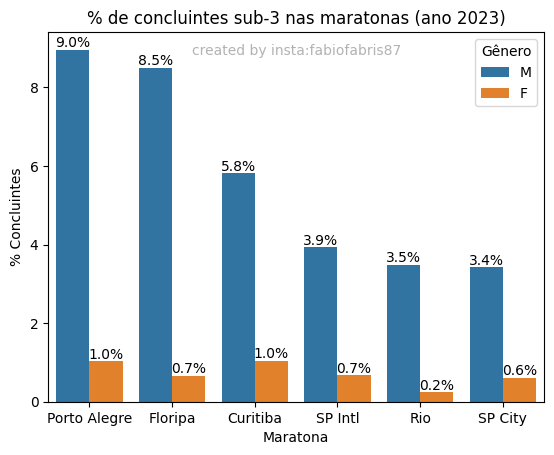

In [8]:
ax = sns.barplot(df.groupby(["maratona", "gender"])[["is_sub_3"]].agg("mean").reset_index().sort_values(["gender", "is_sub_3"], ascending=[False, False]), x="maratona", y="is_sub_3", hue="gender")
ax.set_title("% de concluintes sub-3 nas maratonas (ano 2023)")
ax.set(ylabel='% Concluintes', xlabel='Maratona')
ax.bar_label(ax.containers[0], fontsize=10, fmt=(lambda x : "{:0.1f}%".format(x)));
ax.bar_label(ax.containers[1], fontsize=10, fmt=(lambda x : "{:0.1f}%".format(x)));
ax.legend(title='Gênero', loc='upper right')#, labels=['F', 'M'])

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

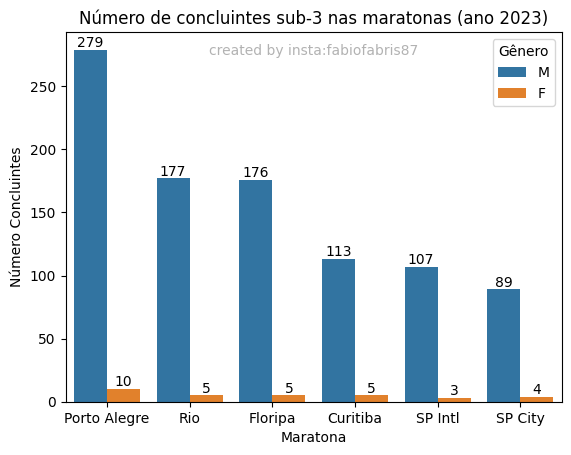

In [27]:
ax = sns.barplot(df.groupby(["maratona", "gender"])[["is_sub_3_n"]].agg("sum").reset_index().sort_values(["gender", "is_sub_3_n"], ascending=[False, False]), x="maratona", y="is_sub_3_n", hue="gender")
ax.set_title("Número de concluintes sub-3 nas maratonas (ano 2023)")
ax.set(ylabel='Número Concluintes', xlabel='Maratona')
ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);
ax.legend(title='Gênero', loc='upper right')#, labels=['F', 'M'])

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

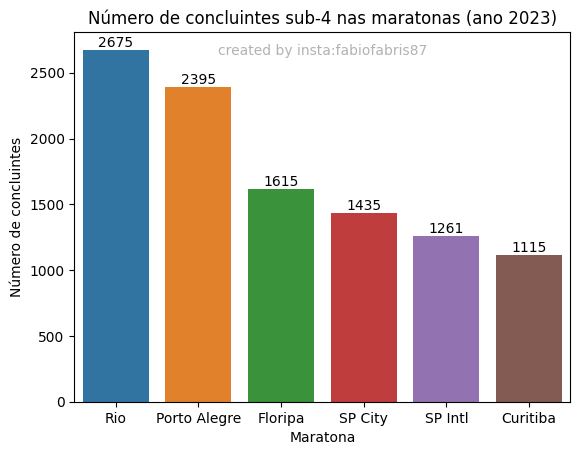

In [24]:

ax = sns.barplot(df.groupby(["maratona"])[["is_sub_4_n"]].agg("sum").reset_index().sort_values(["is_sub_4_n"], ascending=[False]), x="maratona", y="is_sub_4_n")
ax.set_title("Número de concluintes sub-4 nas maratonas (ano 2023)")
ax.set(ylabel='Número de concluintes', xlabel='Maratona')
ax.bar_label(ax.containers[0], fontsize=10);

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

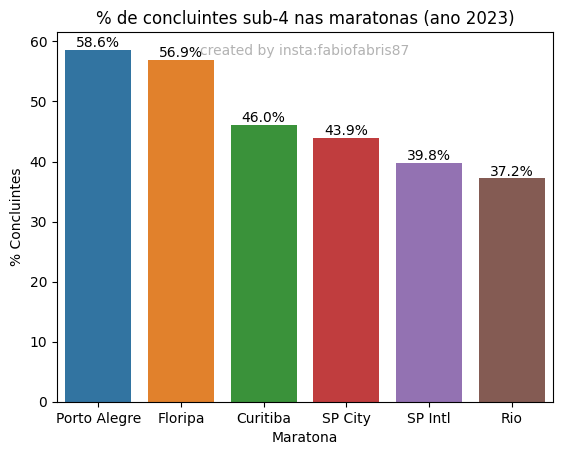

In [20]:
ax = sns.barplot(df.groupby(["maratona"])[["is_sub_4"]].agg("mean").reset_index().sort_values(["is_sub_4"], ascending=[False]), x="maratona", y="is_sub_4")
ax.set_title("% de concluintes sub-4 nas maratonas (ano 2023)")
ax.set(ylabel='% Concluintes', xlabel='Maratona')
ax.bar_label(ax.containers[0], fontsize=10, fmt=(lambda x : "{:0.1f}%".format(x)));

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

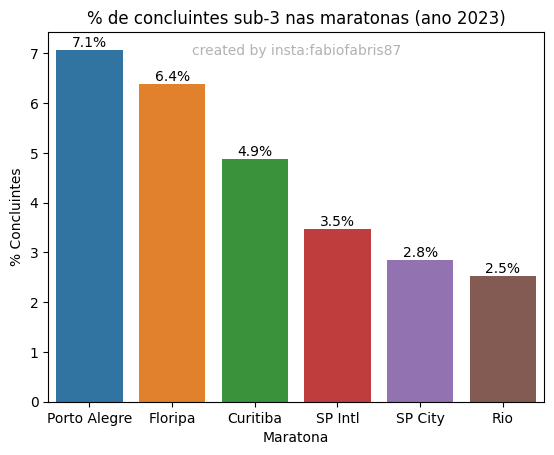

In [10]:
ax = sns.barplot(df.groupby(["maratona"])[["is_sub_3"]].agg("mean").reset_index().sort_values(["is_sub_3"], ascending=[False]), x="maratona", y="is_sub_3")
ax.set_title("% de concluintes sub-3 nas maratonas (ano 2023)")
ax.set(ylabel='% Concluintes', xlabel='Maratona')
ax.bar_label(ax.containers[0], fontsize=10, fmt=(lambda x : "{:0.1f}%".format(x)));

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

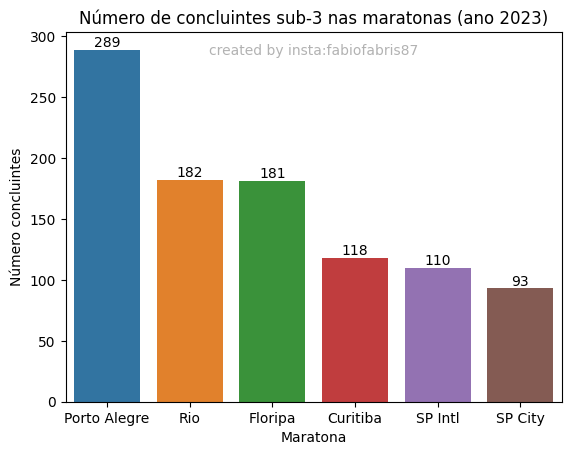

In [29]:
ax = sns.barplot(df.groupby(["maratona"])[["is_sub_3_n"]].agg("sum").reset_index().sort_values(["is_sub_3_n"], ascending=[False]), x="maratona", y="is_sub_3_n")
ax.set_title("Número de concluintes sub-3 nas maratonas (ano 2023)")
ax.set(ylabel='Número concluintes', xlabel='Maratona')
ax.bar_label(ax.containers[0], fontsize=10);

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

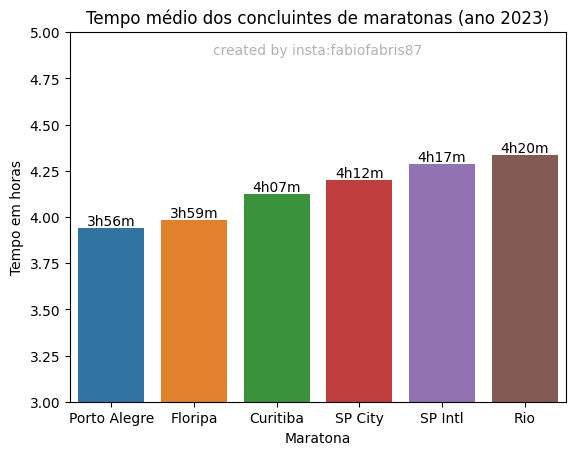

In [31]:
ax = sns.barplot(df.groupby(["maratona"])[["time_in_hours"]].agg("mean").reset_index().sort_values("time_in_hours"), 
                 x="maratona", y="time_in_hours", bottom=0)
ax.set_title("Tempo médio dos concluintes de maratonas (ano 2023)")
ax.set(ylabel='Tempo em horas', xlabel='Maratona')
ax.bar_label(ax.containers[0], fontsize=10, fmt=lambda x: str(int(x))+"h"+
                              "{:02.0f}m".format(60*(x-int(x))));
ax.set(ylim=(3, 5))

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

Text(0.5, 0.95, 'created by insta:fabiofabris87')

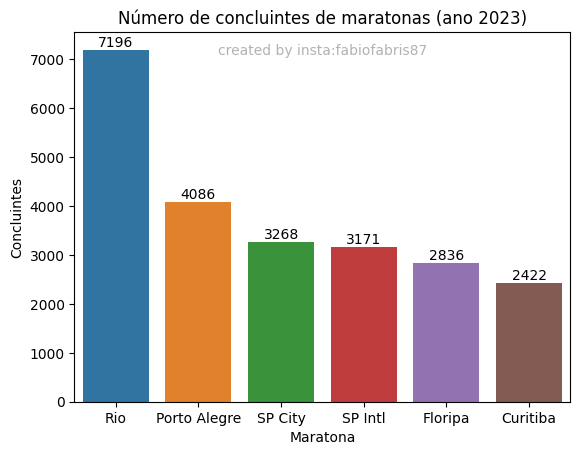

In [12]:
ax = sns.barplot(df.groupby("maratona")[["time"]].agg("count").reset_index().sort_values("time", ascending=False), x="maratona", y="time")
ax.set_title("Número de concluintes de maratonas (ano 2023)")
ax.bar_label(ax.containers[0], fontsize=10);
ax.set(ylabel='Concluintes', xlabel='Maratona')

ax.text(0.50, 0.95, 'created by insta:fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.6,
        ha='center', va='center', rotation=0)

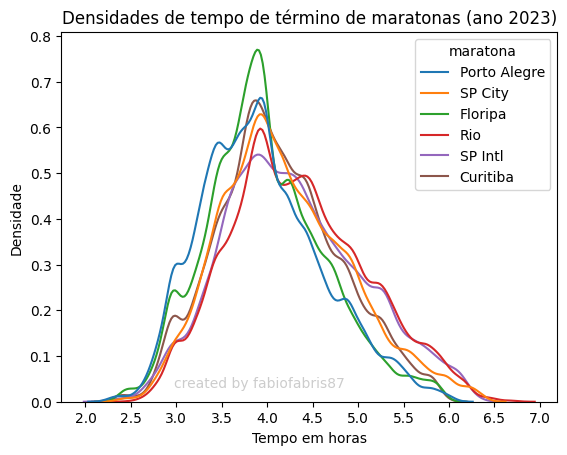

In [13]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt



ax = sns.kdeplot(df, x ="time_in_hours", bw_adjust = 0.6, hue="maratona", common_norm=False)

ax.set(ylabel='Densidade', xlabel='Tempo em horas')
ax.set_title("Densidades de tempo de término de maratonas (ano 2023)")

ax.text(0.40, 0.05, 'created by fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.4,
        ha='center', va='center', rotation=0)


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()


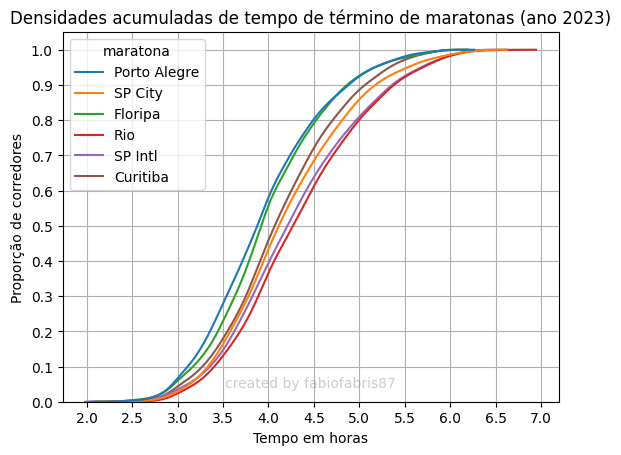

In [14]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt



ax = sns.kdeplot(df, x ="time_in_hours", bw_adjust = .6, hue="maratona", cumulative=True, common_norm=False)

ax.set(ylabel='Proporção de corredores', xlabel='Tempo em horas')
ax.set_title("Densidades acumuladas de tempo de término de maratonas (ano 2023)")


ax.text(0.50, 0.05, 'created by fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.4,
        ha='center', va='center', rotation=0)

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.grid()
plt.show()
# ax.axvline(x = 3*60*60, color = "black", linestyle = "dashed")
# ax.axvline(x = 3*60*60 + 30*60, color = "black", linestyle = "dashed")
# ax.axvline(x = 4*60*60, color = "black", linestyle = "dashed")

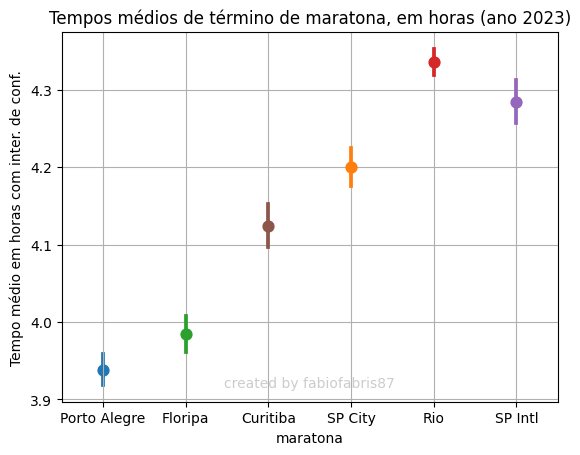

In [15]:
order = ['Porto Alegre', 'Floripa', 'Curitiba', "SP City", "Rio", "SP Intl"]
ax = sns.pointplot(df, x = "maratona", y ="time_in_hours", hue = "maratona", order=order)
ax.set_title("Tempos médios de término de maratona, em horas (ano 2023)")
ax.set(ylabel='Tempo médio em horas com inter. de conf.')
plt.legend([],[], frameon=False)

ax.text(0.50, 0.05, 'created by fabiofabris87', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.4,
        ha='center', va='center', rotation=0)


plt.grid()
plt.show()

In [16]:
df["mean_time_hours"] = df.groupby('name')["time_in_hours"].transform("mean")
df["count"] = df.groupby('name')["time"].transform("count")

# Corredores que correram mais "Majors brasileiras" em 2023

In [17]:
pd.set_option('display.min_rows', 50)
df.sort_values(["count", "name"], ascending=False)

,name,time,gender,maratona,time_in_seconds,time_in_hours,time_timestamp,is_sub_4,is_sub_3,mean_time_hours,count
314,JOSE MARIA DE BRITO CORREA JUNIOR,3:01:26,M,Porto Alegre,10886,3.023889,1900-01-01 03:01:26,100,0,3.461898,6
850,JOSE MARIA DE BRITO CORREA JUNIOR,3:42:09,M,SP City,13329,3.702500,1900-01-01 03:42:09,100,0,3.461898,6
533,JOSE MARIA DE BRITO CORREA JUNIOR,3:25:30,M,Floripa,12330,3.425000,1900-01-01 03:25:30,100,0,3.461898,6
440,JOSE MARIA DE BRITO CORREA JUNIOR,03:15:10,M,Rio,11710,3.252778,1900-01-01 03:15:10,100,0,3.461898,6
2555,JOSE MARIA DE BRITO CORREA JUNIOR,03:47:55,M,SP Intl,13675,3.798611,1900-01-01 03:47:55,100,0,3.461898,6
505,JOSE MARIA DE BRITO CORREA JUNIOR,03:34:07,M,Curitiba,12847,3.568611,1900-01-01 03:34:07,100,0,3.461898,6
2438,ALEXANDRE DE ARAUJO SILVA,4:00:46,M,Porto Alegre,14446,4.012778,1900-01-01 04:00:46,0,0,3.938750,6
1468,ALEXANDRE DE ARAUJO SILVA,4:01:06,M,SP City,14466,4.018333,1900-01-01 04:01:06,0,0,3.938750,6
1522,ALEXANDRE DE ARAUJO SILVA,3:57:45,M,Floripa,14265,3.962500,1900-01-01 03:57:45,100,0,3.938750,6
2512,ALEXANDRE DE ARAUJO SILVA,03:57:58,F,Rio,14278,3.966111,1900-01-01 03:57:58,100,0,3.938750,6


In [18]:
import upsetplot
from upsetplot import from_indicators, plot, from_memberships 

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

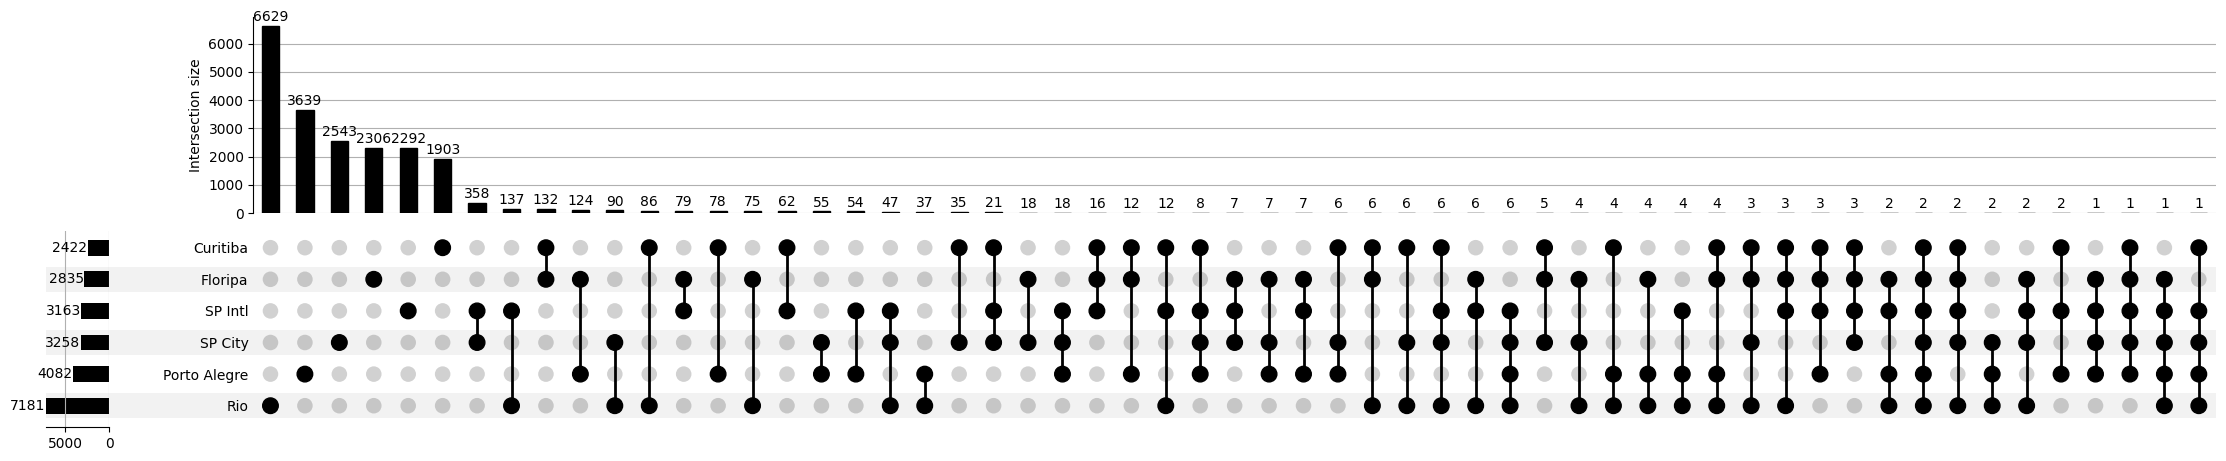

In [19]:
membership_data = list(df.groupby("name")["maratona"].apply(list).values)
membership_data_formatted = from_memberships(membership_data)
plot(membership_data_formatted, subset_size="count", sort_by="cardinality", show_counts=True)